In [1]:
#algunas librerías
from scipy import misc
from scipy import ndimage
import matplotlib.pylab as plt
import numpy as np
#from random import random

C:\Users\fgome\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


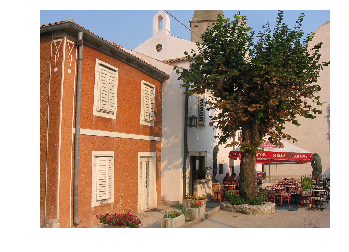

In [2]:
l = misc.imread("croatia-02.jpg")
plt.imshow(l)
plt.axis('off')
plt.show()

C:\Users\fgome\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


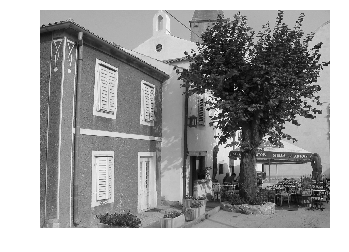

In [3]:
l = misc.imread("croatia-02.jpg")
g = 0.2989 * l[:,:,0] + 0.5870 * l[:,:,1] + 0.1140 * l[:,:,2]
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.show()

# Rango dinámico de una imagen

Para una imagen en escala de grises, definimos el **rango dinámico** de una imagen como la dupla que indica el mínimo y el máximo valor de intensidad en la imagen:

$$[I_{min},\;I_{max}] = [\min (I), \;\max (I)]$$

## Función que identifica el rango dinámico de una imagen

In [4]:
def rango_din(Im):
    I_min = np.min(Im)
    I_max = np.max(Im)

    print (I_min, I_max)

In [5]:
rango_din(g)

(0.0, 252.6066)


Observa que si se utiliza un byte para registrar el valor de intensidad de un pixel, el máximo rango dinámico es: 

$$[0, \;255]$$

## Problemas de contraste

Una imagen presenta problemas de contraste cuando la distribución de sus intensidades no cubre el máximo rango dinámico posible. Cuando se presenta este problema, la imagen puede tener una calidad pobre.

### Transforma el rango de 100 a 200

Para ejemplificar, la siguiente celda cambia el rango dinámico de una imagen y lo restringe al intervalo $[100,\; 200]$

In [6]:
g_min = np.min(g)
g_max = np.max(g)

##########################################
gn = 100+100*(g-g_min)/float(g_max-g_min)
##########################################

rango_din(gn)

(100.0, 200.0)


Visualizamos el histograma de frecuencias de ambas imágenes

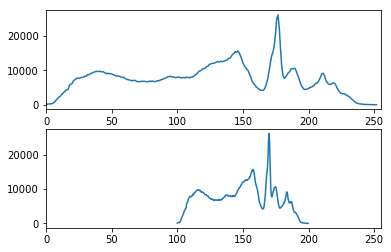

In [7]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

In [8]:
# modificamos la intensidad de un par de pixeles (datos atípicos)
gn[0,0] = 0
gn[0,1] = 255

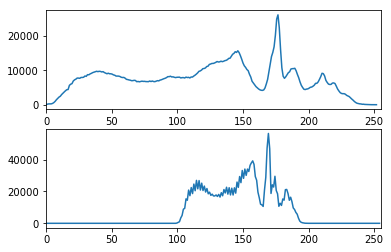

In [9]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

Comparamos las imágenes

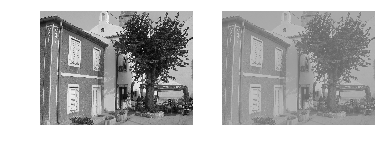

In [10]:
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

Otro ejemplo.

In [11]:
gn = 100*(g-g_min)/float(g_max-g_min)
rango_din(gn)
gn[0,0] = 0
gn[0,1] = 255

(0.0, 100.0)


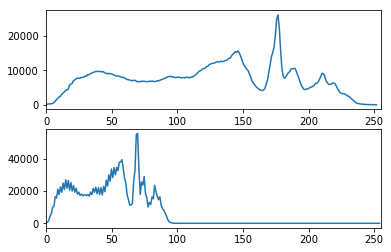

In [12]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

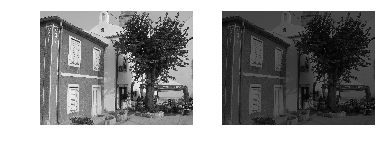

In [13]:
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

## Transformación del rango

Si una imagen no hace uso completo de su rango dinámico, se puede aplicar una transformación lineal para reescalarlo. Un ejemplo es la siguiente:

$$I'[r,c] = 255\frac{I[r,c]-I_{min}}{I_{max}-I_{min}}$$

In [14]:
gn = 100*(g-g_min)/float(g_max-g_min)
rango_din(gn)

(0.0, 100.0)


In [15]:
g_min = np.min(gn)
g_max = np.max(gn)

######################################
g_t = 255*(gn-g_min)/(g_max-g_min)
######################################

In [16]:
rango_din(g_t)

(0.0, 255.0)


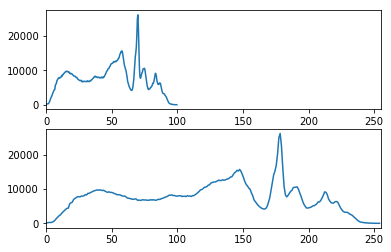

In [17]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

In [21]:
rango_din(gn)
gn[0,0] = 255
rango_din(gn)

(0.0, 100.0)
(0.0, 255.0)


In [19]:
g_min = np.min(gn)
g_max = np.max(gn)

######################################
g_t = 255*(gn-g_min)/(g_max-g_min)
######################################

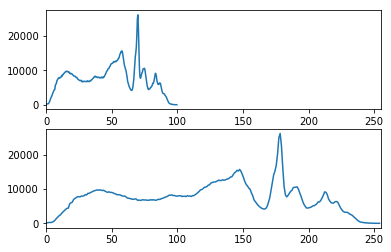

In [20]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

El mejoramiento del contraste puede hacerse más robusto si se consideran percentiles de la intensidad en lugar del mínimo o el máximo.

In [ ]:
x = np.random.rand(1000)
print "Mínimo = " + str(np.min(x))
print "Máximo = " + str(np.max(x))
print "Percentil 1 = " + str(np.percentile(x,1))
print "Percentil 99 = " + str(np.percentile(x,99))